`04지도학습_회귀_.pdf`


# 1. 지도학습 (Supervised Learning)

지도학습 (Supervised Learning) 은 학습 데이터를 이용해 해석용 모델을 만들고 그것을 바탕으로 새로운 데이터를 추정(predict)하는 것이다. 
 - 보통 분류Classifiction, 회귀Regression 및 신경망을 활용한다.
 - 특징을 가진 데이터와 정답(목적)을  나타내는 데이터를 선정해 학습
 - 이미 알려진 사례로 일반화된 모델을 만들어 의사 결정 프로세스를 자동화하는 것



### 데이터
지도학습 모델을 훈련하기 위해서 Label(target)을 사용한다.

- 학습용 데이터 (Training Set)목적
  - 모델이 패턴을 학습하고 예측 규칙을 만드는 데 사용되는 데이터.
  - 인공지능 모델은 학습용 데이터를 통해 입력과 출력 간의 관계 학습. 
  - 예) 고양이, 개인지 분류 모델은 고양이/개 이미지와 레이블(고양이/개)을 학습하여 이미지의 특징을 보고 분류하는 방법을 익힌다.

- 테스트용 데이터 (Test Set)목적
  - 학습된 모델이 이전에 본 적 없는 새로운 데이터에 대해 얼마나 잘 작동하는지, 즉 일반화 성능을 평가하기 위해 사용되는 데이터입니다.
  - 모델 성능 평가: 학습이 완료된 모델은 테스트용 데이터를 사용하여 예측을 수행하고, 이 예측이 실제 레이블과 얼마나 일치하는지 비교하여 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-점수(F1-score) 등의 지표로 성능을 평가합니다.

### 주요 지도학습 알고리즘과 분류 및 회귀 문제 여부

주요 지도학습 알고리즘


<img src='https://i.imgur.com/E7HrgBu.jpeg' width=500>

In [1]:
# NumPy 1.19x, 1.21 에서 테스트, 2021/10
import numpy as np
import pandas as pd

np.__version__

'2.3.1'

In [19]:
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
import matplotlib.font_manager as fm
%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

# plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

Text(0.5, 1.0, '한글 타이틀...')

# 2. 회귀 개념 알아보기

**회귀 분석(Regression analysis)** 이란

- 데이터를 **가장 잘 설명하는 모델**을 찾아 입력값에 따른 미래 결과값을 예측하는 알고리즘
  - 관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한뒤 적합도를 측정해 내는 분석 방법 (위키백과)



- `예) 평균 기온에 따른 아이스크림 판매량`
  - $X$ : 평균 기온, $y$ : 아이스크림 판매량 (데이터)
  - $y = \beta_0 + \beta_1 X$ (가정)
    - 이 직선이 곧 데이터를 가장 잘 설명(= 실제에 근사)하는 모델 
    - 각 데이터의 실제 값과 모델이 예측하는 값의 차이를 최소한으로 하는 선을 찾자.
      - 즉, 적절한 $\beta_0$ 와 $\beta_1$ 을 찾으면 된다.


### 머신러닝 모델의 손실 함수 (Loss Function)

손실 함수는 머신러닝 모델의 예측값과 실제 정답(참값) 사이의 차이를 정량적으로 측정하는 함수입니다. 즉, "우리 모델이 얼마나 틀렸는가?"를 수치화하여 알려주는 지표입니다. 이 손실 함수의 값이 작을수록 모델의 예측이 정답에 가깝고, 모델의 성능이 좋다고 판단합니다.

손실함수는 회귀 문제, 분류 문제에 따라 종류가 달라진다.

- 예) 손실함수 평균제곱의 합
  - 실제 값과 예측 값 차이의 제곱의 합
  - $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$
    - 손실이 작을수록 좋은 모델이다.



#### 회귀문제 손실함수

1. 평균제곱오차 Mean Squared Error, MSE

예측값과 실제 값의 차이를 제곱해서 평균을 낸 값으로 오차가 클수록 더 큰 패널티를 부여한다. 단, 이상치에 민감하다는 단점이 있다.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

2. 평균절대오차 Mean Absolute Error, MAE

예측값과 실제 값의 차이의 절대값을 평균한 값으로 MSE 보다 이상치에 덜 민감하다.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|
$$

#### 분류 (Classification)의 손실함수:

 - 교차 엔트로피 (Cross-Entropy): 주로 분류 문제에서 사용되며, 예측된 확률 분포와 실제 정답 분포 간의 차이를 측정합니다. 모델이 특정 클래스에 속할 확률을 얼마나 정확하게 예측했는지를 나타냅니다.
 - 이진 교차 엔트로피 (Binary Cross-Entropy): 이진 분류 (예: 스팸/정상)에 사용됩니다.
 - 범주형 교차 엔트로피 (Categorical Cross-Entropy): 다중 클래스 분류 (예: 개/고양이/새)에 사용됩니다.

### 손실함수 최적화 하기

손실 함수의 값을 최소화하는 모델의 파라미터(가중치, 편향 등)를 찾아가는 최적화 알고리즘을 사용한다.

- ![image](https://user-images.githubusercontent.com/61646760/140517279-bd8734c9-c3e0-46d7-9a62-c175adc4778f.png)
    - ![image](https://user-images.githubusercontent.com/61646760/140517368-aad92e73-10c4-41bf-9571-7f88b6b77afd.png) (arguments of minimum) : 함수 ![image](https://user-images.githubusercontent.com/61646760/140516833-752063c9-6072-4a16-81d8-9d0c50d3d555.png)를 최솟값으로 만드는 정의역(![image](https://user-images.githubusercontent.com/61646760/140516872-37a9d24e-4c30-4fb0-ad9e-182726014faa.png))의 값
 - ![image](https://user-images.githubusercontent.com/61646760/140510991-70ef4523-52e2-4360-87eb-093d55107db8.png) (y 절편), ![image](https://user-images.githubusercontent.com/61646760/140511012-753ddb9d-d758-4522-9853-280250a50d2a.png) (기울기) 값을 조절하여 Loss 함수의 크기를 작게 할 수 있다.

 - Loss 함수의 크기를 작게 하는 ![image](https://user-images.githubusercontent.com/61646760/140510991-70ef4523-52e2-4360-87eb-093d55107db8.png) (y 절편), ![image](https://user-images.githubusercontent.com/61646760/140511012-753ddb9d-d758-4522-9853-280250a50d2a.png) (기울기)를 찾는 방법
      1. **Gradient descent (경사 하강법)**
      2. **Normal equation (least squres)**



# 3. 단순 선형 회귀


**단순 선형 회귀(Simple Linear Regression)**

- 데이터를 설명하는 모델을 직선 형태로 가정
  - $ y = \beta_0 + \beta_1x$
  - 직선을 구성하는 $\beta_0$ 절편 과 기울기 $\beta_1$ 를 구해야 한다. 
- 특징
  - 가장 기초적이나 여전히 많이 사용되는 알고리즘
  - 입력값이 1개인 경우에만 적용이 가능함
  - 입력값과 결과값의 관계를 알아보는 데 용이함
  - 입력값이 결과값에 얼마나 영향을 미치는지 알 수 있음
  - 두 변수 간의 관계를 직관적으로 해석하고자 하는 경우 활용



<img src='https://user-images.githubusercontent.com/61646760/140540230-183b469c-3d54-4fdb-9ff0-5021a7cf0fc0.png' width=700>

선형 회귀 모델을 푼다는 것은 최적의 선형 방정식을 찾는 것이다. 
 - 가장 흔히 사용되는 방법이 바로 **최소제곱법(Ordinary Least Squares, OLS)** 이다.
 - OLS 과정에서 모델의 "오차"를 측정하는 지표로 **평균 제곱 오차(Mean Squared Error, MSE)** 가 사용된다.

### 단순 선형 회귀 손실함수

- 평균제곱오차 MSE
- 평균절대오차 MAE

1. 평균제곱오차 Mean Squared Error, MSE

    예측값과 실제 값의 차이를 제곱해서 평균을 낸 값으로 오차가 클수록 더 큰 패널티를 부여한다. 단, 이상치에 민감하다는 단점이 있다.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

2. 평균절대오차 Mean Absolute Error, MAE

    예측값과 실제 값의 차이의 절대값을 평균한 값으로 MSE 보다 이상치에 덜 민감하다.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|
$$

### 단순 선형 회귀 모델의 경사 하강법


- 경사하강법(Gradient descent)
   - 경사 하강법은 계산 한번으로 $\beta_0, \beta_1$을 구하는 것이 아니라 초기값에서 점진적으로 구하는 방식
   -  $\beta_0, \beta_1$ 값을 Loss 함수 값이 작아지게 계속 업데이트하는 방법
      1.  $\beta_0, \beta_1$ 값을 랜덤하게 초기화
      2. 현재  $\beta_0, \beta_1$ 값으로 Loss 값 계산
      3. 현재  $\beta_0, \beta_1$ 값을 어떻게 변화해야 Loss 값을 줄일 수 있는지 알 수 있는 **Gradient 값** 계산
      4. Gradient 값을 활용하여  $\beta_0, \beta_1$ 값 업데이트
      5. Loss 값의 차이가 거의 없어질 때까지 2~4번 과정을 반복 (Loss 값과 차이가 줄어들면 Gradient 값도 작아짐) 


경사하강법은 모델의 오차를 점진적으로 줄여가는 방법이다

<img src='https://i.imgur.com/lYTSGrk.png' width=700>

### Scikit-learn 선형회귀 분석

scikit-learn의 LinearRegression 으로 분석해 보자. 사이킷런의 linear_models 에서 선형 회귀를 구현한 LinearRegerssion 을 이용해 예측 회귀를 구현해 보자,
- 사이킷런의 다양한 선형모델 [linear_models](https://scikit-learn.org/stable/modules/linear_model.html)을 참조.

LinearRegression은 예측값과 실제값의 RSS를 최소화해 OLS(Ordianry Least Squares) 추정 방식으로 구현한 클래스이다.

> OLS 기반 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관관계가 매우 높은 경우 분산이 커져 오류에 매우 민감한다. 이런 현상을 다중 공선성(multi-collinearity) 문제라고 한다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용한다. 매우 많은 피처가 다중공선성 문제를 가지고 있다면 PCA를 통해서 차원 축소를 수행하는 것도 고려할 수 있다.


`linear_model.LinearRegression()`


LinearRegression 원형이다.

```python
class sklearn.linear_model.LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None)
```

다음 같은 입력 파라미터가 주로 쓰인다:

- fit_intercept: 기본 True. 절편(Intercept)를 계산할지 말지 여부로 상수항이 없으면 False
- normalize: 기본 False. fit_intercpet=False 인 경우 무시된다. 만약 True면 회귀를 수행전에 입력 데이터 세트를 정규화 한다.


 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

#### - 예제 샘플 데이터

샘플 데이터를 사용한다.
 - `make_regression()` : sklearn.datasets 패키지는 다양한 연습 데이터를 제공하며 회귀와 분류 모델을 테스트하기 위한 가상 데이터를 생성하는 다양한 함수를 제공

In [20]:
from sklearn.datasets import make_regression

In [ ]:
# make_regression


In [ ]:
# 샘플수 200개에 편향 100으로 회귀용 샘플 생성









print("bias:", bias)
print("y:", y[:5])
print("w:",  w )

bias: 100
y: [ 91.93982496 104.5737146  115.90171564  84.84487454  44.88407315]
w: 54.6510981564684


In [28]:
bias=100
X0,y,w=make_regression(
    n_samples=200, # 데이터(row,record)
    n_features=1, # 입력
    bias=bias, # 편향
    noise=10, # 편차
    coef=True, # 계수
    random_state=50
)

print("bias:", bias)
print("y:", y[:5])
print("w:",  w )

bias: 100
y: [ 91.93982496 104.5737146  115.90171564  84.84487454  44.88407315]
w: 54.6510981564684


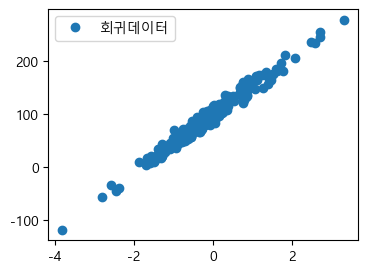

In [29]:
plt.figure(figsize=(4,3))

plt.plot(X0,y,'o',label='회귀데이터')
plt.legend()
plt.show()

make_regression() 식은 편향, 독립변수, 종속변수 및 회귀계수를 반환한다.
 - 결과가 w 54.64, bias 100 이라면 아래 관계를 갖는다.

$$
y = 100 + 54.64 x + \epsilon
$$


In [25]:
X0.shape, y.shape

((200, 1), (200,))

In [26]:
X0[:5], y[:5]

(array([[-0.13664932],
        [-0.14976664],
        [ 0.00159174],
        [-0.07679857],
        [-0.8897683 ]]),
 array([ 91.93982496, 104.5737146 , 115.90171564,  84.84487454,
         44.88407315]))

***코드진행***

Estimater 를 통해 학습 모델(알고리즘)을 생성하고 fit(), predict() 로 학습을 진행한다.

```python
classifier = LinearRegression()
model = classifier.fit(X,y)
```

회귀분석을 하고 나면 Classifier의 model 객체는 다음과 같은 속성을 가지게 된다. 

 - `model.coef_` : 추정된 기울기(가중치) 벡터
 - `model.intercept_`: 추정된 상수항(절편) 값.


모델에 입력 데이터로 결과를 예측/분류한다.

```python
y_new = model.predcit(x_new)
```


바로 위에서 전 처리한 데이터를 `LinearRegression` 모델에 입력하여 학습을 수행해 보자.

- LinearRegression (sklearn) 사용법
  1. `LinearRegression`을 사용하기 위해서는 우선 해당 모델 객체를 불러와 초기화해야 한다.
      - `lrmodel = LinearRegression()`
  2. 모델 초기화를 수행했다면 전 처리된 데이터를 사용하여 학습을 수행할 수 있다. 아래 코드와 같이 `fit` 함수에 학습에 필요한 데이터를 입력하여 학습을 수행한다.
      - `lrmodel.fit(train_X, train_Y)`
  3. LinearRegression의 $\beta_0$, $\beta_1$ 값을 구하기 위해서는 아래 코드를 사용하면 된다.
      ```
      beta_0 = lrmodel.intercept_
      beta_1 = lrmodel.coef_[0]
      ```


In [ ]:
# LinearRegression


[54.48664769] 100.01474440528112


In [30]:
from sklearn.linear_model import LinearRegression

li_clf=LinearRegression()
model=li_clf.fit(X0,y)
type(li_clf)

sklearn.linear_model._base.LinearRegression

In [32]:
model.coef_,model.intercept_

(array([54.48664769]), np.float64(100.01474440528112))

결과는 방정식을 이용해 y를 예측 한다는 것이다.

$$
\hat{y} = 100.01474441 + 54.48664769 x
$$


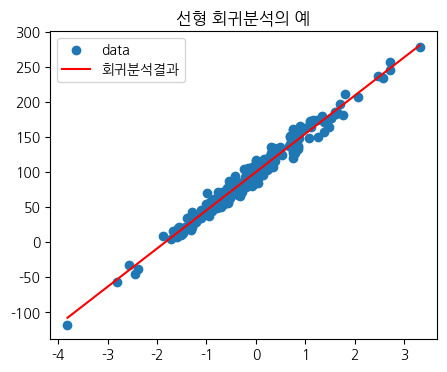

In [ ]:
plt.figure(figsize=(5,4))
# 회귀분석 결과를 시각화 한다.



# 산점도를 그려 봅니다.



# 회귀선 


plt.title('선형 회귀분석의 예')
plt.legend()
plt.show()

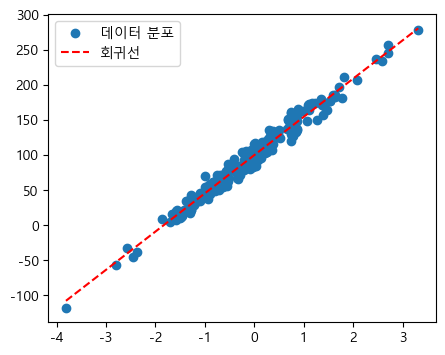

In [44]:
plt.figure(figsize=(5,4))
pred_space=np.linspace(X0.min(),X0.max()).reshape(-1,1)
pred_y=li_clf.predict(pred_space)

# plt.plot(X0,y,'o',label='데이터 분포')
plt.scatter(X0,y,label='데이터 분포')
plt.plot(pred_space,pred_y,'r--',label='회귀선')

plt.legend()
plt.show()

#### - 예측하기

바로 위에서 학습한 모델을 바탕으로 예측 값을 구해 봅시다.
- `predict()` : `LinearRegression`으로 예측을 할 때 사용하는 메서드. `predict` 함수는 DataFrame 또는 numpy array인 X 데이터에 대한 예측값을 리스트로 출력한다.
  - `pred_X = lrmodel.predict(X)`



이제 predict() 메서드로 새로운 $X_{new}$ 에 대응하는 y 값을 예측할 수 있다. 
 - 모델이 학습한 데이터의 최소-최대 범위에서 새 데이터를 생성해 보자.
 - 차원이 있어야 하므로 2차원 데이터를 사용한다.

In [ ]:
# X0의 min, max



(np.float64(3.3140753455120797), np.float64(-3.809890377851563))

In [45]:
X0.min(),X0.max()

(np.float64(-3.809890377851563), np.float64(3.3140753455120797))

In [ ]:
# 새 데이터 [3.0] 의 예측



array([263.47468746])

In [46]:
pred_new=li_clf.predict(np.array([[3.0]]))
pred_new

array([263.47468746])

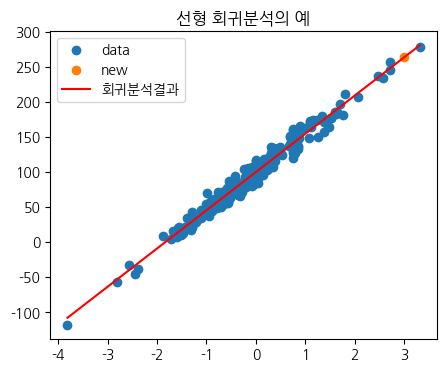

In [ ]:
plt.figure(figsize=(5,4))
# 새로 예측한 결과를 시각화 한다.




# 산점도를 그려 봅니다.


# 새로 예측한 결과


# 회귀선 
plt.plot(pred_space , y_pred, 'r-', label='회귀분석결과')
plt.title('선형 회귀분석의 예')
plt.legend()
plt.show()

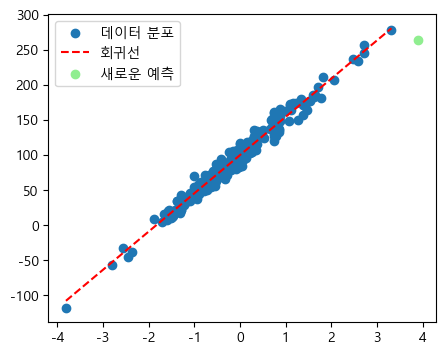

In [56]:
plt.figure(figsize=(5,4))
pred_space=np.linspace(X0.min(),X0.max()).reshape(-1,1)
pred_y=li_clf.predict(pred_space)

# plt.plot(X0,y,'o',label='데이터 분포')
plt.scatter(X0,y,label='데이터 분포')
plt.plot(pred_space,pred_y,'r--',label='회귀선')
plt.scatter([3.9],pred_new,c='lightgreen',label='새로운 예측')

plt.legend()
plt.show()

# 4. 다중 선형 회귀

**다중 선형 회귀((Multiple Linear Regression)**
  - 입력값 ![image](https://user-images.githubusercontent.com/61646760/140957356-e421f52e-0067-4cd6-921d-3f68e1fd5bdb.png)가 여러 개(2개 이상)인 경우 활용할 수 있는 회귀 알고리즘
    - 여러 개의 입력값(![image](https://user-images.githubusercontent.com/61646760/140957356-e421f52e-0067-4cd6-921d-3f68e1fd5bdb.png))으로 결괏값(![image](https://user-images.githubusercontent.com/61646760/140957508-73a8350e-1b1f-4d46-9b5d-29ea92c24d54.png))을 예측하고자 하는 경우
    - 각 개별 ![image](https://user-images.githubusercontent.com/61646760/140958263-a2a0679a-c66e-43a0-8173-cc264dbe7d98.png)에 해당하는 최적의 ![image](https://user-images.githubusercontent.com/61646760/140958332-84f665c2-7bbb-4071-ba41-1d8bc8f178f2.png)를 찾아야 함
  - 다중 선형 회귀 모델
    - ![image](https://user-images.githubusercontent.com/61646760/140958761-d525039a-3bbc-4e0a-882a-8d0838e6cc53.png)
  - 특징
    - 여러 개의 입력값과 결괏값 간의 관계 확인 가능
    - 어떤 입력값이 결괏값에 어떠한 영향을 미치는지 알 수 있음
    - 여러 개의 입력값 간의 상관관계가 높을 경우 결과에 대한 신뢰성을 잃을 가능성이 있음




단항회귀는 독립변수(feature)와 종속변수(target)의 관계가 $ y = b + w_1 x_1 $ 형식인 일차방정식 형태로 표현한 회귀였다.

회귀가 독립변수의 다항식 그리고 2차, 3차 방정식 같은 다항식으로 표현되는 것을 다항회귀(Ploynominal Regression)라 한다. 아래 같은 식일 것이다.

$$
y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + \cdots + w_n x_n + b 
\\
y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2 
$$


#### 다중 선형 회귀 모델의 손실 함수
  - **손실 함수(Loss function)**
    - 단순 선형 회귀(Simple linear regression)와 마찬가지로 Loss 함수는 **입력값과 실제값 차이의 제곱의 합**으로 정의함
      - 마찬가지로 ![image](https://user-images.githubusercontent.com/61646760/140959866-3d8c3475-a0c5-43dc-ac6c-811b14ab3a43.png) 값을 조절하여 Loss 함수의 크기를 작게 함
    - ![image](https://user-images.githubusercontent.com/61646760/140960865-543ec942-202f-420d-ba87-2a816798ed69.png)



#### 다중 선형 회귀 모델의 경사 하강법
- **경사 하강법(Gradient descent)**
- $\beta_0,\beta_1,\beta_2,...,\beta_n$ 값을 Loss 함수 값이 작아지게 계속 업데이트하는 방법
    1. $\beta_0,\beta_1,\beta_2,...,\beta_n$ 값을 랜덤하게 초기화
    2. 현재 $\beta_0,\beta_1,\beta_2,...,\beta_n$ 값으로 Loss 값 계산
    3. 현재 $\beta_0,\beta_1,\beta_2,...,\beta_n$ 값을 어떻게 변화해야 Loss 값을 줄일 수 있는지 알 수 있는 Gradient 값 계산
    4. Gradient 값을 활용하여 $\beta_0,\beta_1,\beta_2,...,\beta_n$ 값 업데이트
    5. Loss 값의 차이가 거의 없어질 때까지 2~4번 과정을 반복(Loss 값과 차이가 줄어들면 Gradient 값도 작아짐)



## 다중 회귀 분석하기 

#### 다중 회귀 분석하기 - 데이터 전 처리

<strong>다중 회귀 분석(Multiple Linear Regression)</strong>은 데이터의 여러 변수(features) $X_0, X_1$ 를 이용해 결과 종속변수 $y$ 를 예측하는 모델이다.



Advertizing 데이터 세트

 - "Advertising 데이터셋“ 데이터셋은 R 패키지 ISLR (An Introduction to Statistical Learning with Applications in R)에 포함되어 있고 통계 학습 및 회귀 분석 예제로 자주 활용된다.

- 아래와 같이 `FB`, `TV`, `Newspaper` 광고에 대한 비용 대비 `Sales` 데이터가 주어졌을 때, 이를 다중 회귀 분석으로 분석해 보자.

   ```
   원본 데이터 샘플 :
      Unnamed: 0     FB    TV  Newspaper  Sales
   0           1  230.1  37.8       69.2   22.1
   1           2   44.5  39.3       45.1   10.4
   2           3   17.2  45.9       69.3    9.3
   3           4  151.5  41.3       58.5   18.5
   4           5  180.8  10.8       58.4   12.9
   ```


In [59]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('./data/Advertising.csv')
df

,Unnamed: 0,FB,TV,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
# LinearRegression
# import r2_score
# import train_test_split

# read Advertising.csv


print('원본 데이터 샘플 :')
print(df.head(),'\n')


원본 데이터 샘플 :
   Unnamed: 0     FB    TV  Newspaper  Sales
0           1  230.1  37.8       69.2   22.1
1           2   44.5  39.3       45.1   10.4
2           3   17.2  45.9       69.3    9.3
3           4  151.5  41.3       58.5   18.5
4           5  180.8  10.8       58.4   12.9 



In [61]:
df=df.drop(['Unnamed: 0'],axis=1)
X=df.drop(['Sales'],axis=1).values
y=df['Sales'].values

In [62]:
df.head()

,FB,TV,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


- 우선 데이터를 전 처리 하기 위해서 3개의 변수를 갖는 feature 데이터와 Sales 변수를 label 데이터로 분리하고 학습용, 평가용 데이터로 나눠 보자.


In [ ]:
# 입력 변수로 사용하지 않는 Unnamed: 0 변수 데이터를 삭제합니다.


# 1.피처 데이터를 선택

# 2. Sales 변수는 label 데이터 Y에 저장


#2. 학습용 평가용 데이터로 분리합니다.



In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1, random_state = 20)
from sklearn.linear_model import LinearRegression
lg_clf=LinearRegression()
lg_clf.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
# 전 처리한 데이터를 출력합니다.
print('train_X : ')
print(train_X.head(),'\n')

train_X : 
        FB    TV  Newspaper
79   116.0   7.7       23.1
197  177.0   9.3        6.4
38    43.1  26.7       35.1
24    62.3  12.6       18.3
122  224.0   2.4       15.6 



In [13]:
print('train_Y : ')
print(train_Y.head(),'\n')


train_Y : 
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
Name: Sales, dtype: float64 



In [14]:
print('test_X : ')
print(test_X.head(),'\n')


test_X : 
        FB    TV  Newspaper
95   163.3  31.6       52.9
15   195.4  47.7       52.9
30   292.9  28.3       43.2
158   11.7  36.9       45.2
128  220.3  49.0        3.2 



In [15]:
print('test_Y : ')
print(test_Y.head())

test_Y : 
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64


In [69]:
pred_X=lg_clf.predict(X_test)
pred_X

array([18.41579099])

#### 다중 회귀 분석하기 - 학습하기
앞에서 전 처리한 데이터를 바탕으로 다중 선형 회귀 모델을 적용해 보자.

- 여러개의 독립변수 페이스북 $X_1$, TV인 $X_2$와 신문광고 $X_3$ 를 사용하고
- 종속변수를 구하는 방정식은 다음과 같을 것이다.
  - $\text{Sales} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3 X_3$



- 다중 선형 회귀 또한 선형 회귀 모델과 마찬가지로 `LinearRegression`을 사용할 수 있다.
  - `LinearRegression`의 $\beta$ 등 패러미터 구현
    ```
    lrmodel = LinearRegression()
    lrmodel.intercept_
    lrmodel.coef_[i]
    ```
    - `intercept_` : $\beta_0$ 에 해당하는 값
    - `coef_[i]` : i+1번째 변수에 곱해지는 패러미터 값
- 그럼 이번에는 학습용 데이터를 다중 선형 회귀 모델을 사용하여 학습하고, 학습된 패러미터를 출력해 보자.

```


In [71]:
for c in df.columns:
    print(f'{c} : ', df[c].min(),',', df[c].max())

FB :  0.7 , 296.4
TV :  0.0 , 49.6
Newspaper :  0.3 , 114.0
Sales :  1.6 , 27.0


In [ ]:
df1=pd.DataFrame(np.array([[0.5,30.0,70.0],[50,39.0,60.0],[90,70,88],[70,40.5,20.1],[10,10,10]]), columns=['FB','TV','Newspaper'])
df1

,FB,TV,Newspaper
0,0.5,30.0,70.0
1,50.0,39.0,60.0
2,90.0,70.0,88.0
3,70.0,40.5,20.1
4,10.0,10.0,10.0


In [74]:
pred_df1=lg_clf.predict(df1.values)
pred_df1

array([ 8.53164211, 12.50552625, 20.14596367, 13.73699345,  5.25736631])

In [ ]:
from sklearn.linear_model import LinearRegression

#1. 다중 선형 회귀 모델을 초기화하고 학습합니다
   # 모델 초기화
  # train data로 학습

#2. 학습된 결과:
   # y절편 (기본 판매량)
     # 1번째 변수에 대한 계수 (페이스북)
     # 2번째 변수에 대한 계수 (TV)
     # 3번째 변수에 대한 계수 (신문)

print("beta_0: %f" % beta_0)  # beta_0: 2.979067
print("beta_1: %f" % beta_1)  # beta_1: 0.044730
print("beta_2: %f" % beta_2)  # beta_2: 0.189195
print("beta_3: %f" % beta_3)  # beta_3: 0.002761


beta_0: 2.979067
beta_1: 0.044730
beta_2: 0.189195
beta_3: 0.002761


#### 다중 회귀 분석하기 - 예측하기

위에서 학습한 다중 선형 회귀 모델을 바탕으로 이번엔 새로운 광고 비용에 따른 `Sales` 값을 예측해 보자.

- `predict()` : `LinearRegression`의 예측을 위한 함수
  - `pred_X = lrmodel.predict(X)`



test_X에 대해서 예측합니다.

In [ ]:
# test_X에 대해서 예측합니다.

print('test_X에 대한 예측값 : \n{}\n'.format(pred_X))

test_X에 대한 예측값 : 
[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]



train_X에 대해서 예측합니다.

In [51]:
train_X

,FB,TV,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [85]:
train_X['FB'].shape, train_Y.shape

((160,), (160,))

In [ ]:
# train_X 의 예측
y_pred = 

In [87]:
y_pred.shape

(160,)

In [ ]:
print("\n--- 학습된 모델의 회귀 계수 (Coefficients) ---")





--- 학습된 모델의 회귀 계수 (Coefficients) ---
FB: 0.0447
TV: 0.1892
Newspaper: 0.0028
Intercept: 2.9791


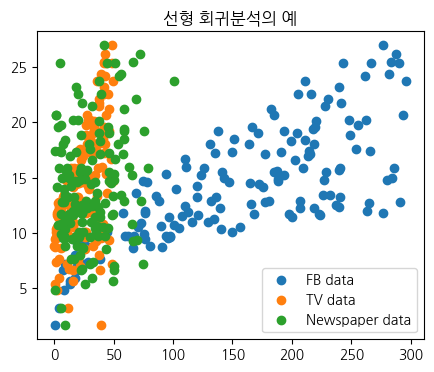

In [ ]:
# 회귀분석 결과를 시각화 한다.
plt.figure(figsize=(5,4))

# 산점도를 그려 봅니다.




plt.title('선형 회귀분석의 예')
plt.legend()
plt.show()

### - 예측

In [82]:
# 새로운 데이터 df1을 정의합니다
df1 = pd.DataFrame(np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 1]]),
                    columns=['FB', 'TV', 'Newspaper'])
print('df1 : ')
print(df1)


df1 : 
   FB  TV  Newspaper
0   0   0          0
1   1   0          0
2   0   1          0
3   0   0          1
4   1   1          1


In [ ]:
#2. df1에 대해서 예측합니다.

print('df1에 대한 예측값 : \n{}'.format(pred_df1))

df1에 대한 예측값 : 
[2.97906734 3.02379686 3.16826239 2.98182845 3.21575302]


# 회귀 평가 지표
- 모델링 이후에는 해당 모델이 얼마나 목표를 잘 달성했는지 그 정도를 평가해야 한다.
  - 실제 값과 모델이 예측하는 값의 차이에 기반한 평가 방법 사용
    - 예) ***RSS, MSE, MAE, MAPE, $R^2$***


#### RSS - 단순 오차

<p align="center">
  <img src="https://user-images.githubusercontent.com/61646760/142760068-08dc44aa-2393-40fc-8206-469b206a11ae.png" />
</p>

- **잔차 제곱 합 (RSS: residual sum of squares)**
  - 실제 값과 예측 값의 단순 오차 제곱 합 
  - 값이 작을수록 모델의 성능이 높음 
  - 전체 데이터에 대한 실제 값과 예측하는 값의 오차 제곱의 총합
- RSS 특징
  - 가장 간단한 평가 방법으로 직관적인 해석이 가능함
  - 그러나 오차를 그대로 이용하기 때문에 입력값의 **크기에 의존적**임
  - 절대적인 값과 비교가 불가능함



#### MSE, MAE - 절대적인 크기에 의존한 지표

<p align="center">
  <img src="https://user-images.githubusercontent.com/61646760/142760333-4ecafd8d-d7d0-499a-882d-54a8a119ab0a.png" /><br>
  <img src="https://user-images.githubusercontent.com/61646760/142760435-ef233285-b219-4b67-96a7-490740a7003c.png" />
</p>

- **평균 제곱 오차 (MSE: Mean Squared Error)**
  - RSS에서 데이터 수만큼 나눈 값
  - 작을수록 모델의 성능이 높다고 평가할 수 있음
- **평균 절대 오차 (MAE: Mean Absolute Error)**
  - 평균 절댓값 오차
  - 실제 값과 예측값의 오차의 절댓값의 평균
  - 작을수록 모델의 성능이 높다고 평가할 수 있음
- MSE, MAE 특징
  - **MSE** : 이상치(Outlier) 즉, 데이터들 중 크게 떨어진 값에 민감함 
  - **MAE** : 변동성이 큰 지표와 낮은 지표를 같이 예측할 시 유용 
  - 가장 간단한 평가 방법들로 직관적인 해석이 가능함 
  - 그러나 평균을 그대로 이용하기 때문에 입력 값의 크기에 의존적임 
  - 절대적인 값과 비교가 불가능함



### **RMSE** | Root Mean Squared Error

MSE에 root를 씌운 값. 오류 지표를 실제 값과 유사한 단위로 다시 변환하기에 해석이 다소 용이해진다.

$$ RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2} $$

 - n: 레코드 수
 -  i: 각 레코드 행의 인덱스
 - yi: i번째 행 데이터 실제값
 - $\bar{y_i}$: i번째 행 데이터 예측 값

**RMSE 특징**
 
 - 값을 최소화 했을 때 결과가, 오차가 정규분포를 따른다.
 - RMSE를 최소화 하는 예측 값이 평균값이다. 
 

### **RMSLE** | Root Mean Squared Log Error

오차를 구할 때 RMSE와는 log를 추가하는 점이 다르다.

$$ RMSLE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( \log (\hat{y}_i + 1) - \log(y_i +1) \right)^2} $$
- log(0)이 나오는 것을 방지하기 위해 +1을 해주었다.
- 데이터에 `-` 가 있으면 안된다.

RMSLE의 특징

1. 아웃라이어에 덜 민감하다. (robust) : 아웃라이어가 있더라도 값의 변동폭이 크지 않다.
2. 상대적 Error를 측정해준다. 
      - 값의 절대적 크기가 커지면 RMSE의 값도 커지지만, RMSLE는 상대적 크기가 동일하다면 RMSLE의 값도 동일하다.
      - 예측값 = 100, 실제값 = 90일 때, RMSLE = 0.1053, RMSE = 10
      - 예측값 = 10,000, 실제값 = 9,000일 때, RMSLE = 0.1053, RMSE = 1,000


### R-squared 결정 계수


결정계수는 실제 관측값의 분산대비 예측값의 분산을 계산하여 데이터 예측의 정확도 성능을 측정하는 지표이다. 0~1까지 수로 나타내어지며 1에 가까울수록 100%의 설명력을 가진 모델이라고 평가를 하게된다. 
 - 분산 기반으로 예측 성능을 평가. 
  - 회귀 모델의 설명력을 표현하는 지표
  - 1에 가까울수록 높은 성능의 모델이라고 해석할 수 있음


$$\begin{aligned} 
R^2 &= \frac{ \text{SSE}}{\text{SST}}\\
&= 1 - \frac{ \text{SSR}}{ \text{SST}}
\end{aligned}
$$




SST 총 제곱합, SSE는 회귀식 추정값과 관측값의 평균 간 차이인 회귀제곱합, SSR은 잔차 제곱합이다.

$$ \text{SST} = \sum_{i=1}^{n} ( y_i - \bar{y_i} )^2 \\
\\
\text{SSE} = \sum_{i=1}^{n} (\hat{y_i} - \bar{y_i} )^2
\\
\text{SSR} = \sum_{i=1}^{n} (y_i - \hat{y_i} )^2
$$

- $y_i$: 관측값
- $\bar{y_i}$ : 관측값 평균
- $\hat{y_i}$ : 회귀 추정값

###  평가 지표 정리

- 0에 가까울 수록 좋은 성능: MSE, MAE, RMSE, RMSLE
- 1에 가까울 수록 좋은 성능: R-Squared
 

### 실습: 평가지표

앞에 이어 `Sales` 예측 모델의 성능을 평가하기 위해서 다양한 회귀 알고리즘 평가 지표를 사용하여 비교해 보자.

이번 실습에서는 학습용 및 평가용 데이터에 대해서 MSE와 MAE을 계산해 보겠다. sklearn 라이브러리 함수를 통하여 쉽게 구할 수 있다. N 은 전체 샘플의 개수를 의미함)

MSE, MAE 평가 지표를 계산하기 위한 sklearn 함수
  - `from sklearn.metrics import mean_squared_error` :  MSE 값 계산하기
    - `mean_squared_error(y_true, y_pred)`
  - `from sklearn.metrics import mean_absolute_error` : MAE 값 계산하기
    - `mean_absolute_error(y_true, y_pred)`

```


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# 데이터를 읽고 전 처리합니다
df = pd.read_csv("data/Advertising.csv")
df = df.drop(columns=['Unnamed: 0'])

X = df.drop(columns=['Sales'])
Y = df['Sales']

# 훈련데이터 분할



# 다중 선형 회귀 모델을 초기화하고 학습합니다


# train_X 의 예측값을 계산합니다



In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# 데이터를 읽고 전 처리합니다
df1 = pd.read_csv("./data/Advertising.csv")
df1 = df1.drop(columns=['Unnamed: 0'])

X = df1.drop(columns=['Sales'])
y = df1['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 50)

lg_clf1=LinearRegression()
lg_clf1.fit(X_train,y_train)

pred_train=lg_clf1.predict(X_train)
MSE_train=mean_squared_error(y_train,pred_train)
MAE_train=mean_absolute_error(y_train,pred_train)
MSE_train,MAE_train

(2.7826550430375327, 1.2536683102080395)

In [4]:
pred_test=lg_clf1.predict(X_test)
MSE_test=mean_squared_error(y_test,pred_test)
MAE_test=mean_absolute_error(y_test,pred_test)
MSE_test,MAE_test

(3.1512468619012837, 1.3710779291742359)

In [ ]:
# 1. train_X 의 MSE, MAE 값을 계산합니다



print('MSE_train : %f' % MSE_train)  # MSE_train : 2.705129
print('MAE_train : %f' % MAE_train)  # MAE_train : 1.198468

# test_X 의 예측값을 계산합니다


# 2. test_X 의 MSE, MAE 값을 계산합니다

print('MSE_test : %f' % MSE_test)  # MSE_test : 3.174097
print('MAE_test : %f' % MAE_test)  # MAE_test : 1.460757

MSE_train : 2.705129
MAE_train : 1.198468
MSE_test : 3.174097
MAE_test : 1.460757


#### 실습 R2 평가지표

앞에 이어 `Sales` 예측 모델의 성능을 평가하기 위해서 다양한 회귀 알고리즘 평가 지표를 사용하여 비교해 보자.

이번 실습에서는 학습용 및 평가용 데이터에 대해 R2 score를 계산해 보겠다.

R2 score는 위와 같이 정의할 수 있고 sklearn 라이브러리 함수를 통하여 쉽게 구할 수 있다. $N$ 은 전체 샘플의 개수를 의미함)



R2 평가 지표를 계산하기 위한 sklearn 함수
  - `from sklearn.metrics import r2_score`

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# 데이터를 읽고 전 처리합니다
df = pd.read_csv("./data/Advertising.csv")
df = df.drop(columns=['Unnamed: 0'])

X = df.drop(columns=['Sales'])
Y = df['Sales']

# 훈련데이터 분할



# 다중 선형 회귀 모델을 초기화 하고 학습합니다



# train_X 의 예측값을 계산합니다


"""
1. train_X 의 R2 값을 계산합니다
"""

print('R2_train : %f' % R2_train)  # R2_train : 0.895701

# test_X 의 예측값을 계산합니다


"""
2. test_X 의 R2 값을 계산합니다
"""

print('R2_test : %f' % R2_test)  # R2_test : 0.899438

R2_train : 0.895701
R2_test : 0.899438


In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

R2_train=r2_score(y_train,pred_train)
R2_train

0.8982071449737832

In [16]:
lg_clf2=LinearRegression()
lg_clf2.fit(X_train,y_train)
lg_clf2.predict(X_test)

array([13.85648235, 14.3986382 ])

In [14]:
R2_test=r2_score(y_test,pred_test)
R2_test

-1.6043362495051947

## ex) iris data 평가지표

iris 데이터 세트로 확인해 보자.

In [96]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()

In [97]:
# 학습 데이터를 DataFrame으로 확인
iris_df = pd.DataFrame(iris_dataset['data'], # 데이터
                       columns=iris_dataset['feature_names'])
iris_df['target'] = iris_dataset['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 훈련데이터 분할
X_train, X_test, y_train, y_test = 




In [100]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression



/home/qkboo/micromamba/envs/ML_P312/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# 예측



In [103]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

print(f'r2 score : {r2_score(y_test, predict)}')
print(f'MAE     : {mean_absolute_error(y_test, predict)}')
print(f'MSE     : {mean_squared_error(y_test, predict)}')
print(f'RMSE   : {np.sqrt(mean_squared_error(y_test, predict)) }')
print(f'RMSLE  : {np.sqrt(mean_squared_log_error(y_test, predict)) }')

r2 score : 0.7682926829268293
MAE     : 0.13157894736842105
MSE     : 0.13157894736842105
RMSE   : 0.3627381250550058
RMSLE  : 0.14707765309038084
